In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community
from networkx.algorithms import community as comm

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [9]:
def readData():
    tweets = pd.read_csv('/home/tripti/Desktop/Vivek/NSW/Project/Kashmir/#Kashmir_tweets.csv')
    G = nx.DiGraph()
    return G, tweets

def editUserIdColumn(tweets):
    tweets['user_id'] = tweets.user_id.apply(lambda s : s[1:])
    tweets['status_id'] = tweets.status_id.apply(lambda s : s[1:])
    tweets['retweet_status_id'] = tweets.status_id.apply(lambda s : s[1:])
    tweets['retweet_user_id'] = tweets.status_id.apply(lambda s : s[1:])

def makeUserDictionary(userDict, users):
    for index in users.index:
        key1 = users['user_id'][index]
        val1 = users['screen_name'][index]
        key2 = users['retweet_user_id'][index]
        val2 = users['retweet_screen_name'][index]
        userDict[key1] = val1
        userDict[key2] = val2
    return userDict

def createRetweetGraph(retweets, G):
    for i in retweets.index:
        u = retweets['screen_name'][i]
        v = retweets['retweet_screen_name'][i]
        G.add_edge(u, v)
    return G

def detectCommunities(G_fb, layout):
 
    parts = community.best_partition(G_fb)
    values = [parts.get(node) for node in G_fb.nodes()]

    figsize = (30, 30)
    fig = plt.figure(figsize=figsize)
    
    plt.axis("off")
    nx.draw_networkx(G_fb, pos = layout, 
                     cmap = plt.get_cmap("jet"),
                     node_color = values,
                     node_size = 200, 
                     with_labels = True
                    )
    plt.savefig("retweet_communities.png", format = "PNG")
    return parts

def findCommunities(G, layout):
    
    communities_generator = comm.girvan_newman(G)
    top_level_communities = next(communities_generator)
    communities = {}
    communintyNumber = 0
    for group in top_level_communities:
        communintyNumber +=1
        for screenName in group:
            communities[screenName] = communintyNumber
            
    values = [communities.get(node) for node in G.nodes()]
    figsize = (25, 25)
    fig = plt.figure(figsize=figsize)
                         
    plt.axis("off")
    nx.draw_networkx(G, pos = layout, 
                     cmap = plt.get_cmap("jet"),
                     node_color = values,
                     node_size = 200, 
                     with_labels = True
                    )
    plt.savefig("retweet_communities.png", format = "PNG")
    return communities

In [10]:
G, tweets = readData()
retweet_data = tweets[['user_id','screen_name', 'retweet_user_id', 'retweet_screen_name']]
editUserIdColumn(tweets)
retweet_data = retweet_data.dropna()
G = createRetweetGraph(retweet_data, G)

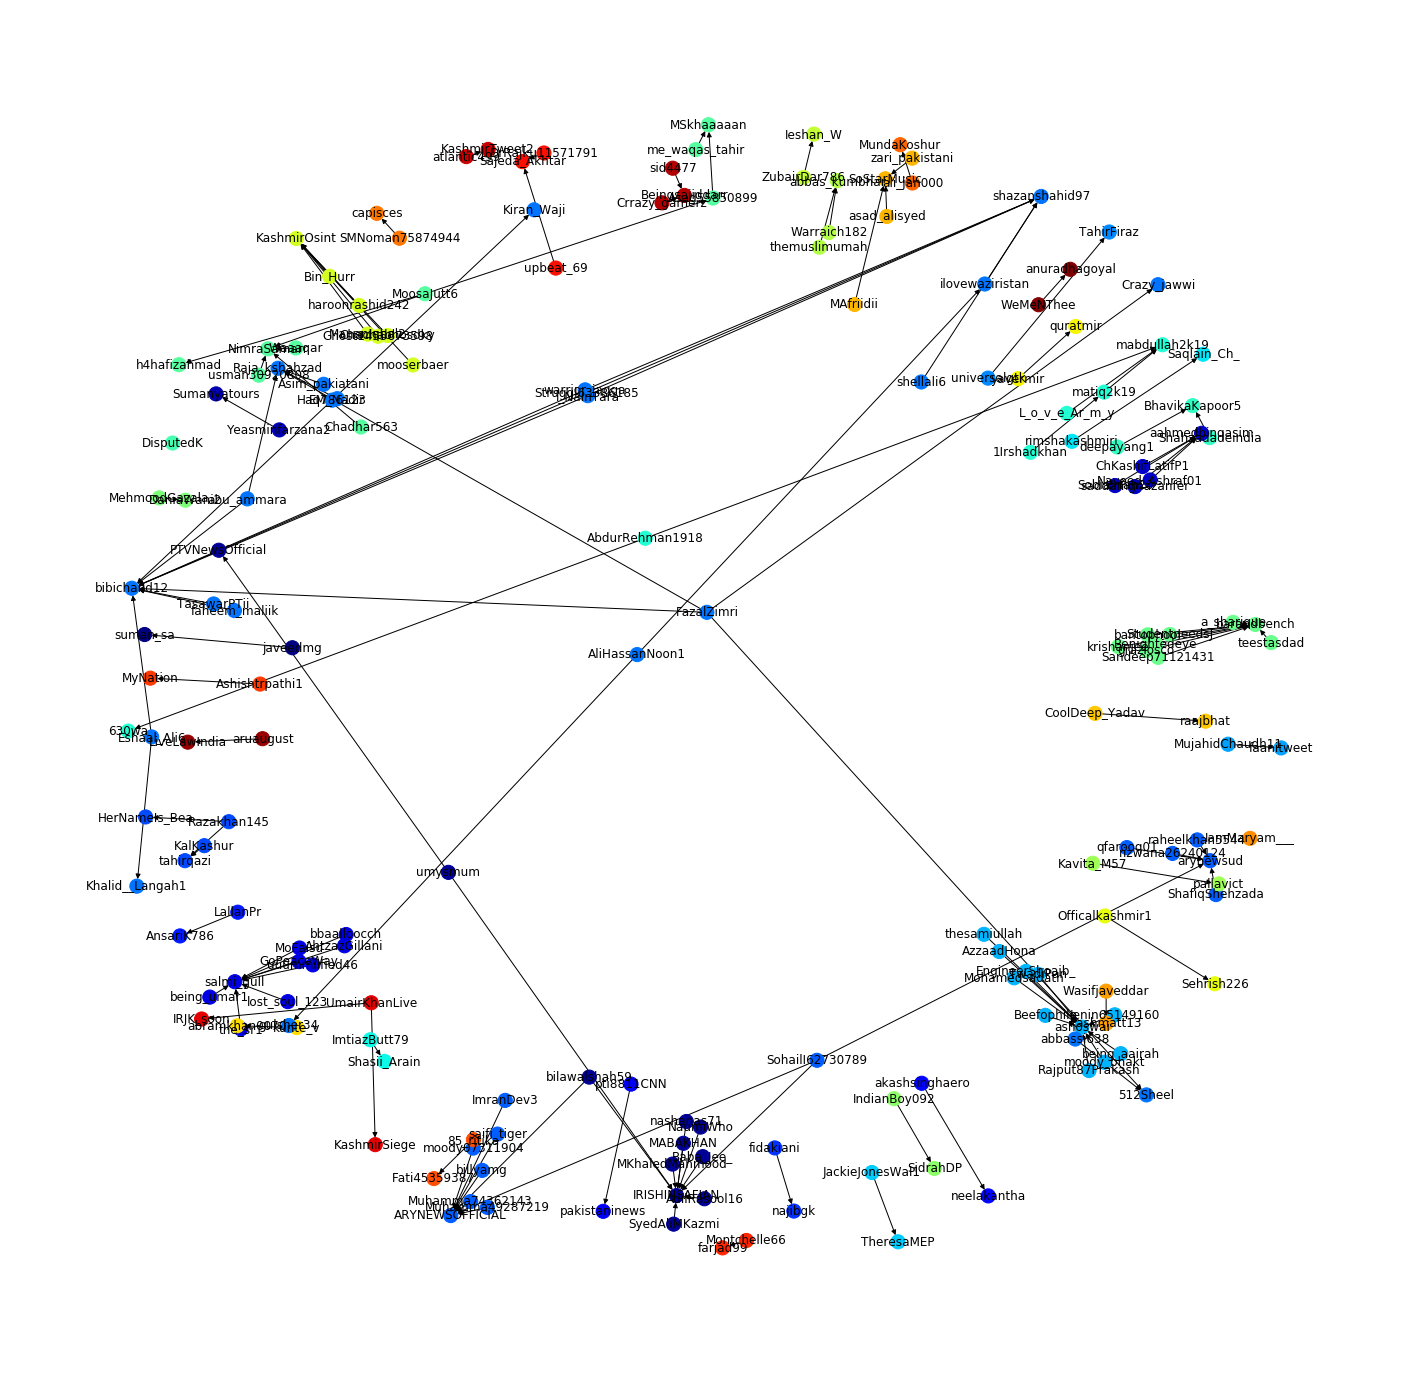

In [11]:
spring_pos = nx.spring_layout(G, k = 0.1)
parts = findCommunities(G, spring_pos)

In [12]:
nx.write_edgelist(G, '/home/tripti/Desktop/Vivek/NSW/Project/Kashmir/KashmirRetweetEdgeList')

In [13]:
len(G.nodes)

184